## Ejercicio 

#### A )

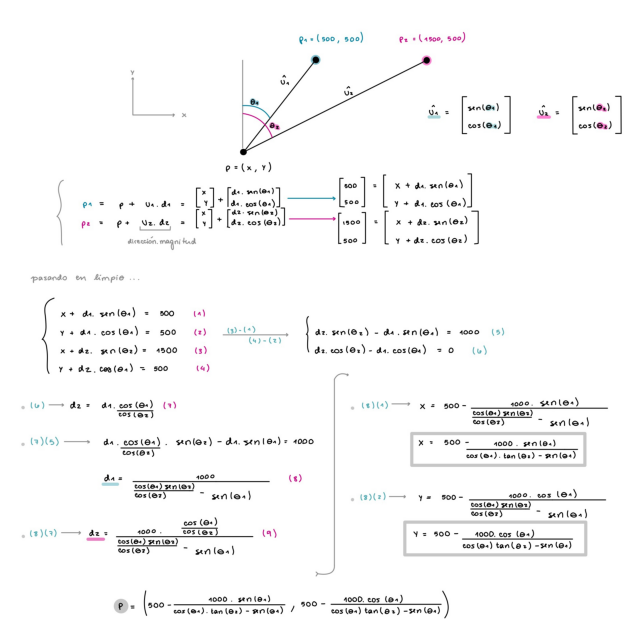

In [251]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('punto1a.jpg')
plt.figure(figsize=(10, 8))  
plt.imshow(img)
plt.axis('off') 
plt.show()


### B )

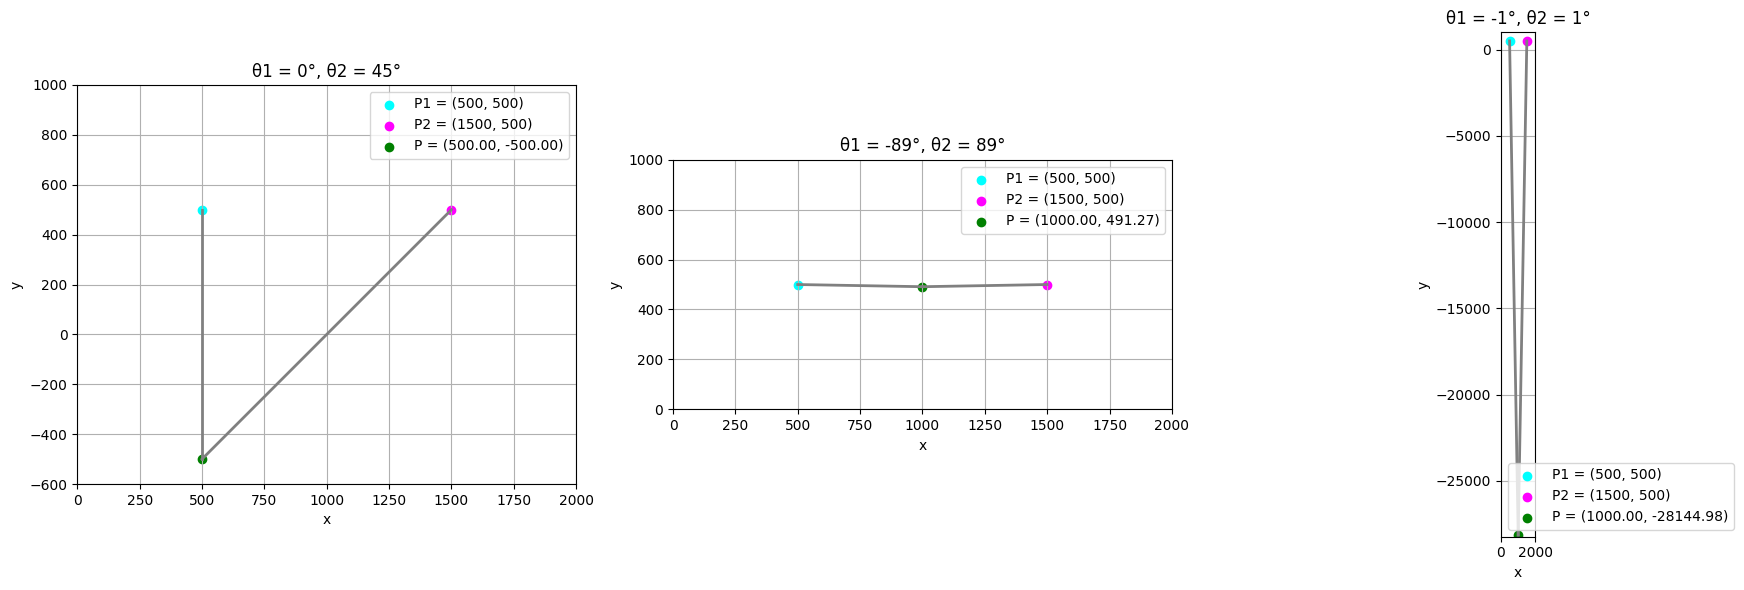

In [240]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_coordenadas_de_p(theta1, theta2):
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    try:
        d1 = 1000 / ((np.cos(theta1) * np.sin(theta2) / np.cos(theta2)) - np.sin(theta1))
    except ZeroDivisionError:
        return None, None 
    xp = 500 - d1 * np.sin(theta1)
    yp = 500 - d1 * np.cos(theta1)
    if np.isfinite(xp) and np.isfinite(yp):
        return xp, yp
    else:
        return None, None 

def graficar_conjuntos_de_theta(conjuntos):
    fig, axs = plt.subplots(1, len(conjuntos), figsize=(18, 6))
    for i, (theta1, theta2) in enumerate(conjuntos):
        p1 = (500, 500)
        p2 = (1500, 500)
        xp, yp = calcular_coordenadas_de_p(theta1, theta2)
        if xp is None or yp is None:
            axs[i].set_title(f'θ1 = {theta1}°, θ2 = {theta2}°\nInvalid coordinates')
            axs[i].set_xlim(0, 2000)
            axs[i].set_ylim(0, 1000)
            axs[i].set_aspect('equal', adjustable='box')
            axs[i].grid(True)
            continue
        p = (xp, yp)
        
        axs[i].scatter(*p1, color='aqua', label=f'P1 = (500, 500)')
        axs[i].scatter(*p2, color='magenta', label=f'P2 = (1500, 500)')
        axs[i].scatter(*p, color='green', label=f'P = ({xp:.2f}, {yp:.2f})')
        axs[i].plot([p[0], p1[0]], [p[1], p1[1]], color='grey', linestyle='-', linewidth=2)
        axs[i].plot([p[0], p2[0]], [p[1], p2[1]], color='grey', linestyle='-', linewidth=2)
        xmin = min(0, xp - 100)
        xmax = max(2000, xp + 100)
        ymin = min(0, yp - 100)
        ymax = max(1000, yp + 100)
        axs[i].set_xlim(xmin, xmax)
        axs[i].set_ylim(ymin, ymax)
        axs[i].set_aspect('equal', adjustable='box')
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].set_title(f'θ1 = {theta1}°, θ2 = {theta2}°')
        axs[i].legend()
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()

conjuntos = [(0, 45), (-89, 89), (-1, 1)]
graficar_conjuntos_de_theta(conjuntos)


### C )

#### i ) El número de condición de la matriz que hay que invertir para computar p (o sea, $\kappa$(A))


In [241]:
import numpy as np

def matriz(theta_1, theta_2):
    return np.array([
    [np.sin(np.radians(theta_2)), -np.sin(np.radians(theta_1))],
    [np.cos(np.radians(theta_2)), -np.cos(np.radians(theta_1))]
])

matriz_1 = matriz(0,45)
numero_de_conficion_1 = np.linalg.cond(matriz_1)
print("Número de condición del primer caso:", numero_de_conficion_1)

matriz_2 = matriz(-89,89)
numero_de_conficion_2 = np.linalg.cond(matriz_2)
print("Número de condición del segundo caso:", numero_de_conficion_2)

matriz_3 = matriz(-1,1)
numero_de_conficion_3 = np.linalg.cond(matriz_3)
print("Número de condición del tercer caso:", numero_de_conficion_3)

Número de condición del primer caso: 2.4142135623730954
Número de condición del segundo caso: 57.28996163075915
Número de condición del tercer caso: 57.28996163075958


#### ii ) El valor singular máximo y valor singular mínimo de dicha matriz ($\sigma_{max}$ y $\sigma_{min}$ )

In [242]:
def calcular_valores_singulares(theta_1, theta_2):
    mi_matriz = matriz(theta_1, theta_2)
    U, S, Vt = np.linalg.svd(mi_matriz)
    sigma_max = S[0]
    sigma_min = S[-1] 
    return sigma_max, sigma_min

smax_1, smin_1 = calcular_valores_singulares(0, 45)
print(f"""Valores singulares para θ1 = 0°, θ2 = 45° son:
    σ_max = {smax_1:.4f}, σ_min = {smin_1:.4f}""")

smax_2, smin_2 = calcular_valores_singulares(-89, 89)
print(f"""Valores singulares para θ1 = -89°, θ2 = 89° son: 
    σ_max = {smax_2:.4f}, σ_min = {smin_2:.4f}""")

smax_3, smin_3 = calcular_valores_singulares(-1, 1)
print(f"""Valores singulares para θ1 = -1°, θ2 = 1° son: 
    σ_max = {smax_3:.4f}, σ_min = {smin_3:.4f}""")

Valores singulares para θ1 = 0°, θ2 = 45° son:
    σ_max = 1.3066, σ_min = 0.5412
Valores singulares para θ1 = -89°, θ2 = 89° son: 
    σ_max = 1.4140, σ_min = 0.0247
Valores singulares para θ1 = -1°, θ2 = 1° son: 
    σ_max = 1.4140, σ_min = 0.0247


#### iii ) La sensibilidad de la posición estimada del punto p con respecto a la medición del ángulo θ1. Es decir, queremos saber cómo cambiaría la estimación de las coordenadas del punto p si cambiaramos (infinitesimalmente) la medición del ángulo θ1. Matemáticamente, queremos computar ∇θ1 p (el gradiente de p con respecto a θ1). Esto nos indica el efecto que tendría un error de medición en θ1 sobre la posición estimada.

In [243]:
import numpy as np
from sympy import symbols, diff, sin, cos, tan

theta_1, theta_2 = symbols('theta_1 theta_2')
px = 500 - (1000 * sin(theta_1)) / (cos(theta_1) * tan(theta_2) - sin(theta_1))
py = 500 - (1000 * cos(theta_1)) / (cos(theta_1) * tan(theta_2) - sin(theta_1))
dp1_dtheta1 = diff(px, theta_1)
dp2_dtheta1 = diff(py, theta_1)
dp1_dtheta1, dp2_dtheta1

     
     
     



(-1000*(sin(theta_1)*tan(theta_2) + cos(theta_1))*sin(theta_1)/(-sin(theta_1) + cos(theta_1)*tan(theta_2))**2 - 1000*cos(theta_1)/(-sin(theta_1) + cos(theta_1)*tan(theta_2)),
 -1000*(sin(theta_1)*tan(theta_2) + cos(theta_1))*cos(theta_1)/(-sin(theta_1) + cos(theta_1)*tan(theta_2))**2 + 1000*sin(theta_1)/(-sin(theta_1) + cos(theta_1)*tan(theta_2)))

\[
\begin{pmatrix}
-\frac{1000 \cdot (\sin(\theta_1) \cdot \tan(\theta_2) + \cos(\theta_1)) \cdot \sin(\theta_1)}{(-\sin(\theta_1) + \cos(\theta_1) \cdot \tan(\theta_2))^2} - \frac{1000 \cdot \cos(\theta_1)}{-\sin(\theta_1) + \cos(\theta_1) \cdot \tan(\theta_2)} \\
-\frac{1000 \cdot (\sin(\theta_1) \cdot \tan(\theta_2) + \cos(\theta_1)) \cdot \cos(\theta_1)}{(-\sin(\theta_1) + \cos(\theta_1) \cdot \tan(\theta_2))^2} + \frac{1000 \cdot \sin(\theta_1)}{-\sin(\theta_1) + \cos(\theta_1) \cdot \tan(\theta_2)}
\end{pmatrix}
\]


#### iv ) La sensibilidad de la posición estimada del punto p con respecto a las coorde- nadas del punto p1. Matemáticamente, queremos computar Jp1 p (el Jacobiano de p con respecto a p1).

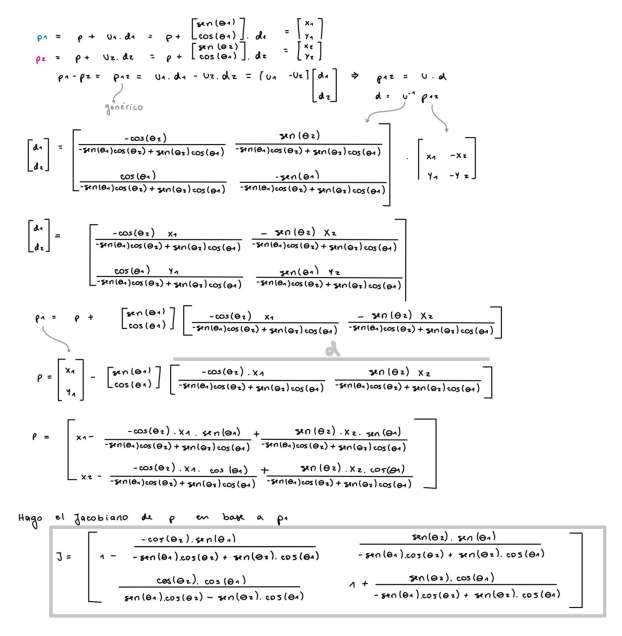

In [252]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('punto1c4.jpg')
plt.figure(figsize=(10, 8)) 
plt.imshow(img)
plt.axis('off')  
plt.show()


---

# Ejercicio 2
### A )

$$
\min_{x} (\frac{1}{5}) x^6 - (\frac{5}{4}) x^4 + 2 x^2
$$


#### Método del gradiente descendiente 

In [244]:
import numpy as np
import sympy as sp

def f(x):
    return (1/5) * x**6 - (5/4) * x**4 + 2 * x**2

def f_prima(x):
    try:
        return (6/5) * x**5 - 5 * x**3 + 4 * x
    except OverflowError:
        return np.inf
    
def f_segunda_prima(x):
    return 6 * x**4 - 15 * x**2 + 4

def gradiente_descendiente(semilla, alpha=0.01, convergencia=0.01):
    x = semilla
    while True:
        gradient = f_prima(x)
        if gradient == np.inf:
            print(f"Al utilizar la semilla {semilla} el algoritmo diverge, por eso se detiene la iteración.")
            return None
        x_next = x - alpha * gradient
        if abs(gradient) < convergencia:
            break
        x = x_next
    return x

semillas = [1, 2, -1, -2, 5]

for semilla in semillas:
    resultado = gradiente_descendiente(semilla)
    if resultado is not None:
        print(f"El valor mínimo de x, comenzando por {semilla}, es {resultado:.3f}")
        if abs(f_prima(resultado)) <= 0.01:
            print("Es un óptimo local")
        else: 
            print(f"{resultado} no es un óptimo local")

El valor mínimo de x, comenzando por 1, es 0.002
Es un óptimo local
El valor mínimo de x, comenzando por 2, es 1.758
Es un óptimo local
El valor mínimo de x, comenzando por -1, es -0.002
Es un óptimo local
El valor mínimo de x, comenzando por -2, es -1.758
Es un óptimo local
Al utilizar la semilla 5 el algoritmo diverge, por eso se detiene la iteración.


Se observa que existen diferentes mínimos locales, y dependiendo de la semilla inicial se puede llegar a uno u otro. Al seguir la pendiente hacia un punto más bajo, cada extremo de la función que encuentra este método es un mínimo local. Comenzando desde la semilla en el punto $x = 5$, se observa cierta divergencia, dado que el gradiente de la función se vuelve infinito cuando cruza ese eje vertical.

#### Método de Newton

In [245]:
import sympy as sp

def f(x):
    return (1/5) * x**6 - (5/4) * x**4 + 2 * x**2

def f_prima(x):
    return (6/5) * x**5 - 5 * x**3 + 4 * x

def f_segunda_prima(x):
    return 6 * x**4 - 15 * x**2 + 4

def metodo_newton(semilla, convergencia=0.01):
    x = semilla
    while True:       
        if f_segunda_prima(x) == 0:
            print(f"La segunda derivada es cero en el punto x = {x}. El método no puede continuar.")
            return None
        x_next = x - (f_prima(x) / f_segunda_prima(x))
        if abs(f_prima(x)) < convergencia:
            return x_next
        x = x_next

semillas = [1, 2, -1, -2, 5, 0.4, 0.2]

for semilla in semillas:
    resultado = metodo_newton(semilla)
    if resultado is not None:
        print(f"El valor mínimo encontrado para la semilla {semilla} es x = {resultado:.3f}")
    if abs(f_prima(resultado)) <= 0.01:
        print("Es un óptimo local")
    else: 
        print(f"{resultado} no es un óptimo local")
    if f_segunda_prima(resultado) < 0:
        print("No es un mínimo")

El valor mínimo encontrado para la semilla 1 es x = 1.039
Es un óptimo local
No es un mínimo
El valor mínimo encontrado para la semilla 2 es x = 1.757
Es un óptimo local
El valor mínimo encontrado para la semilla -1 es x = -1.039
Es un óptimo local
No es un mínimo
El valor mínimo encontrado para la semilla -2 es x = -1.757
Es un óptimo local
El valor mínimo encontrado para la semilla 5 es x = 1.757
Es un óptimo local
El valor mínimo encontrado para la semilla 0.4 es x = -0.000
Es un óptimo local
El valor mínimo encontrado para la semilla 0.2 es x = -0.000
Es un óptimo local


Este método logra encontrar los extremos óptimos, pero no necesariamente los deseados. Dado que se basa en la primera y segunda derivada, y se guía por la convexidad de la función en la semilla inicial, ignora que en ciertos puntos (como ocurrió en $x=1$ y $x=-1$) existe un mínimo óptimo que, al estar separado por un punto de inflexión, pasa desapercibido. Por esta razón, el método encontró máximos en lugar de localizar un mínimo cercano. La segunda derivada en el punto de inflexión ubicado entre 1 y 0 (donde se encuentra el mínimo óptimo) es 0, lo que provoca que parte de la iteración tienda a infinito. Sin embargo, se demostró que si se escoge una semilla que esté del mismo lado que el óptimo (es decir, sin un punto de inflexión entre la semilla y el objetivo), el algoritmo es capaz de encontrarlo, como ocurrió con $x=0.2$ y $x=0.4$.

In [246]:
def es_convexa(segunda_derivada, var):
    condicion = segunda_derivada >= 0
    solucion = sp.solveset(condicion, var, domain=sp.S.Reals)
    return solucion == sp.S.Reals
x = sp.symbols('x')
segunda_derivada = f_segunda_prima(x)
convexa = es_convexa(segunda_derivada, x)
print(f"La función es convexa: {convexa}")

La función es convexa: False


Dado que la función no es convexa, los extremos óptimos encontrados no son necesariamente los óptimos globales. Comenzar con semillas aleatorias en todo el dominio de los números reales podría eventualmente determinar el mínimo global, pero este enfoque sería muy costoso y no garantizaría una solución 100% exacta.

### B )
$$
\min{x_1, x_2} (x_1 −2)^2 +(x_1 −1)(x_2 −1)+(x_2 −3)^2
$$

#### Método del gradiente descendiente

In [247]:
import numpy as np

def f(x1, x2):
    return (x1 - 2)**2 + (x1 - 1)*(x2 - 1) + (x2 - 3)**2

def gradiente_f(x1, x2):
    df_dx1 = 2*(x1 - 2) + (x2 - 1)
    df_dx2 = (x1 - 1) + 2*(x2 - 3)
    return np.array([df_dx1, df_dx2])

def gradiente_descendiente(semilla, alpha=0.01, convergencia=0.01):
    x = np.array(semilla)
    iteraciones = 0
    while True:
        gradiente = gradiente_f(x[0], x[1])
        x_next = x - alpha * gradiente
        iteraciones += 1
        if np.linalg.norm(gradiente) < convergencia:
            break
        x = x_next
    return x, iteraciones

semillas = [[0, 0], [100, 100], [100, -100], [-100, 100], [-100, -100]]
for semilla in semillas:
    resultado, iteraciones = gradiente_descendiente(semilla)
    print(f"El valor mínimo comenzando por {semilla} se encuentra en [{resultado[0]:.3f}, {resultado[1]:.3f}] después de {iteraciones} iteraciones.")
    gradiente_del_punto = gradiente_f(resultado[0], resultado[1])
    if np.linalg.norm(gradiente_del_punto) < 0.01:
        print("Es un óptimo local")
    else:
        print("No es un óptimo local")


El valor mínimo comenzando por [0, 0] se encuentra en [1.007, 2.993] después de 494 iteraciones.
Es un óptimo local
El valor mínimo comenzando por [100, 100] se encuentra en [1.007, 2.993] después de 494 iteraciones.
Es un óptimo local
El valor mínimo comenzando por [100, -100] se encuentra en [1.007, 2.993] después de 953 iteraciones.
Es un óptimo local
El valor mínimo comenzando por [-100, 100] se encuentra en [0.993, 3.007] después de 951 iteraciones.
Es un óptimo local
El valor mínimo comenzando por [-100, -100] se encuentra en [1.007, 2.993] después de 494 iteraciones.
Es un óptimo local


#### Método de Newton

In [248]:
import numpy as np

def metodo_newton(semilla, convergencia=0.01):
    x = np.array(semilla, dtype=float)
    
    i=0
    while True:
        gradiente = np.array([
            2 * (x[0] - 2) + (x[1] - 1),
            2 * (x[1] - 3) + (x[0] - 1)
        ])
        hessiana = np.array([
            [2, 1],
            [1, 2]
        ])
        delta_x = np.linalg.inv(hessiana).dot(gradiente)
        x = x - delta_x
        i+=1
        if np.linalg.norm(gradiente) < convergencia:
            break
    return x, i

semillas = [[0, 0], [100, 100], [100, -100], [-100, 100], [-100, -100]]
for semilla in semillas:
    resultado, iteraciones = metodo_newton(semilla)
    print(f"El valor mínimo comenzando por {semilla} se encuentra en [{resultado[0]:.3f}, {resultado[1]:.3f}] después de {iteraciones} iteraciones")




El valor mínimo comenzando por [0, 0] se encuentra en [1.000, 3.000] después de 2 iteraciones
El valor mínimo comenzando por [100, 100] se encuentra en [1.000, 3.000] después de 2 iteraciones
El valor mínimo comenzando por [100, -100] se encuentra en [1.000, 3.000] después de 2 iteraciones
El valor mínimo comenzando por [-100, 100] se encuentra en [1.000, 3.000] después de 2 iteraciones
El valor mínimo comenzando por [-100, -100] se encuentra en [1.000, 3.000] después de 2 iteraciones



Es posible apreciar que el método del gradiente converge en muchas más iteraciones que el método de Newton. Utilizando las mismas semillas en ambos casos, el método del gradiente descendente promedió 677 iteraciones, mientras que el de Newton alcanzó el objetivo en solo 2 iteraciones en todos los casos. Esta superioridad se debe a que el primer método utiliza la función y su primera derivada (Gradiente), mientras que el segundo método también emplea la segunda derivada (Hessiano), lo que le permite tener un conocimiento más preciso de la función a minimizar. Otro factor que afecta el rendimiento del método del gradiente es el *learning rate*; cuanto menor sea este, más lenta será la convergencia. Sin embargo, incluso variando e intentando con diferentes valores de $\alpha$, el método de Newton sigue siendo significativamente más rápido.



In [249]:
import numpy as np

def es_convexa():
    hessiana = np.array([
        [2, 1],
        [1, 2]
    ])
    valores_propios = np.linalg.eigvals(hessiana)
    return np.all(valores_propios >= 0)
convexa = es_convexa()
print(f"La función es convexa: {convexa}")

gradiente_aplicada = gradiente_f(1,3)
punto_critico = np.all(gradiente_aplicada == 0)
if punto_critico:
    if convexa:
        print("Es un óptimo global")
    else:
        print("Es un óptimo local")
else: 
    print("No es un punto óptimo")


La función es convexa: True
Es un óptimo global


Dado a que la función es convexa en su totalidad, todo punto óptimo que se encuentre es el óptimo global.